In [33]:
import numpy as np
from io_utils import loadGraph, permuteNoiseMat, writeEdgesToFile

A = loadGraph('metadata/phys.edges', 'd')
removeIsolatedNodes(A)
B = permuteNoiseMat(A,is_perm=False, has_noise=True)

writeEdgesToFile('metadata/phys-A.edges', A)
writeEdgesToFile('metadata/phys-perm.edges', B)

241
(241, 241)


In [34]:
from attr_utils import *

attributesA = getDirAttribute('metadata/phys-A.edges')
with open('metadata/attributesA', 'w') as f:
    for index, row in attributesA.iterrows():
        f.write(str(attributesA.ix[index]))

attributesB = getDirAttribute('metadata/phys-perm.edges')
with open('metadata/attributesB', 'w') as f:
    for index, row in attributesB.iterrows():
        f.write(str(attributesB.ix[index]))

In [35]:
from lsh_utils import *

combineAB = selectAndCombine(attributesA, attributesB)

bandDeg = ['Degree','InDegree','OutDegree','NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity', \
                'PageRank', 'HubsScore', 'AuthoritiesScore']
bucketDeg = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 20)
with open('metadata/buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['EgonetDegree', 'EgonetInDegree', 'EgonetOutDegree',\
                'AvgNeighborDeg', 'AvgNeighborInDeg', 'AvgNeighborOutDeg','EgonetConnectivity']
bucketEdge = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 20)
with open('metadata/buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandScore = ['PageRank', 'HubsScore', 'AuthoritiesScore']
bucketScore = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandScore), 20)
with open('metadata/buckets-band-3', 'w') as f:
    for k, v in bucketScore.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketScore.items())

#band4 = ['Degree', 'NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
#bucket4 = generateBuckets(selectAndCombine(attributesA, attributesB, band4), 20)
#with open('metadata/buckets-band-4', 'w') as f:
#    for k, v in bucket4.items():
#        f.write(str(k) + str(v) + '\n')
#print len(bucket4.items())

#band5 = ['InDegree','OutDegree','PageRank', 'HubsScore', 'AuthoritiesScore']
#bucket5 = generateBuckets(selectAndCombine(attributesA, attributesB, band5), 20)
#with open('metadata/buckets-band-5', 'w') as f:
#    for k, v in bucket5.items():
#        f.write(str(k) + str(v) + '\n')
#print len(bucket5.items())

buckets = [bucketDeg, bucketEdge, bucketScore]

97
73
29


Degree


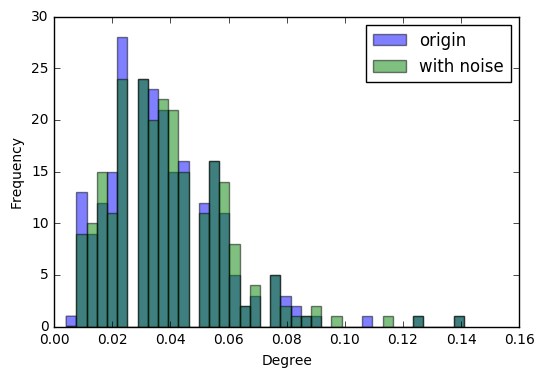

InDegree


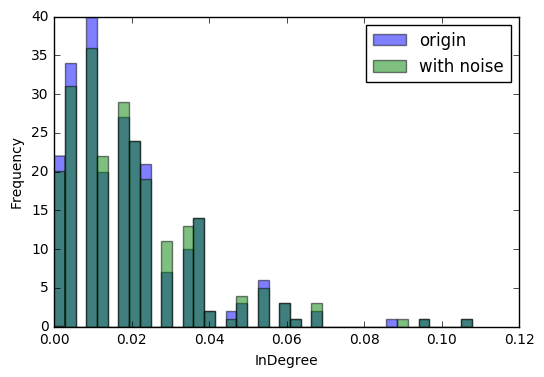

OutDegree


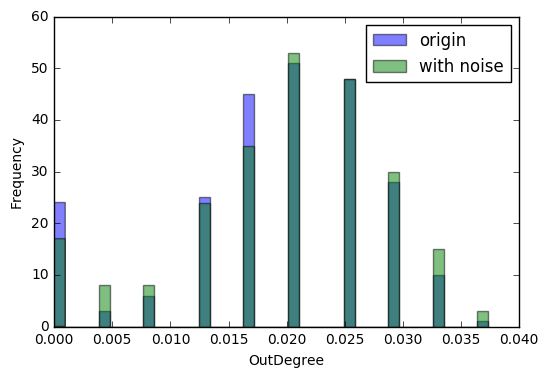

NodeBetweennessCentrality


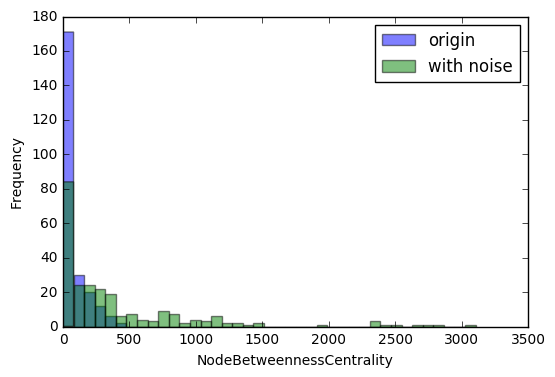

FarnessCentrality


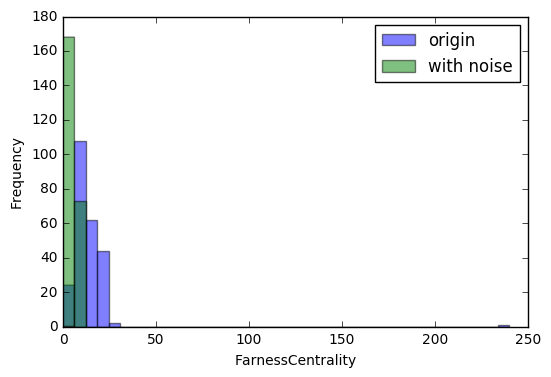

NodeEccentricity


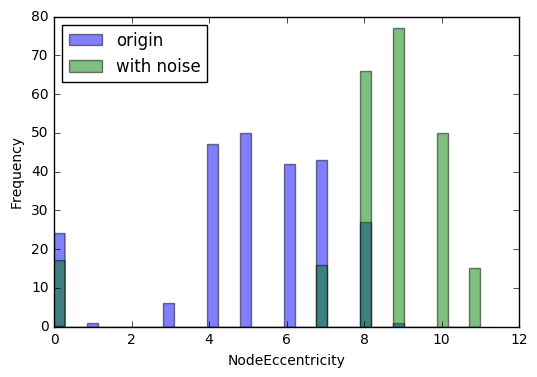

PageRank


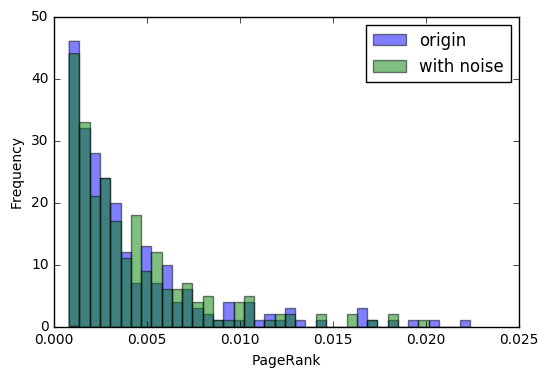

HubsScore


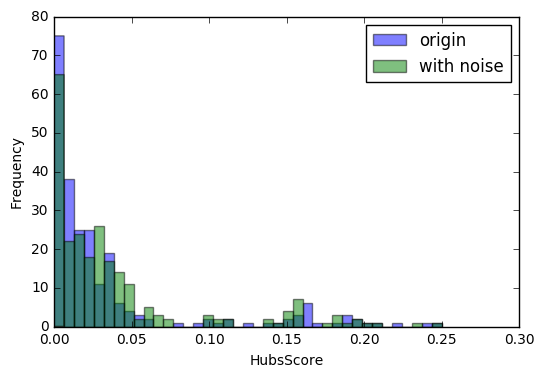

AuthoritiesScore


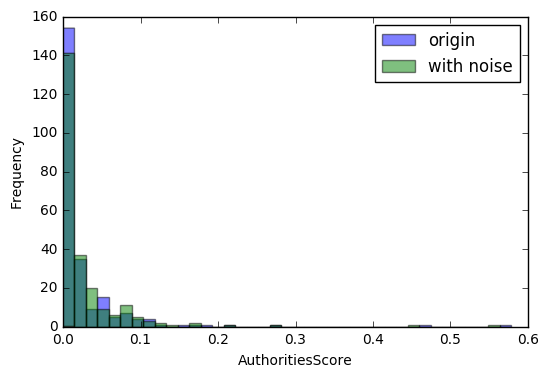

EgonetDegree


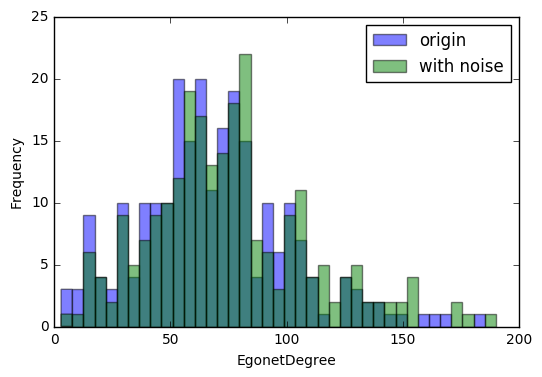

EgonetInDegree


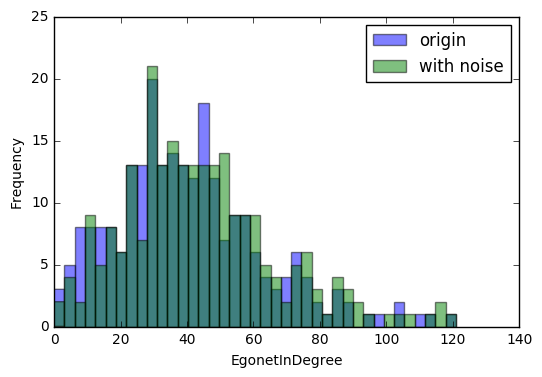

EgonetOutDegree


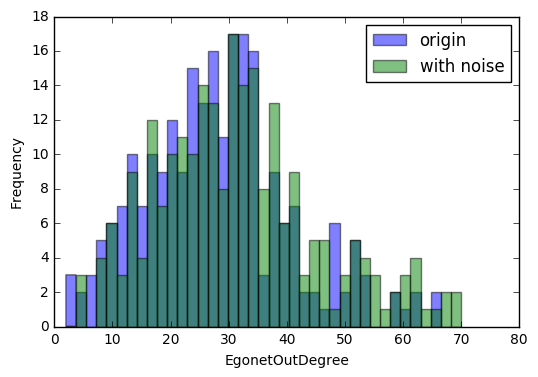

AvgNeighborDeg


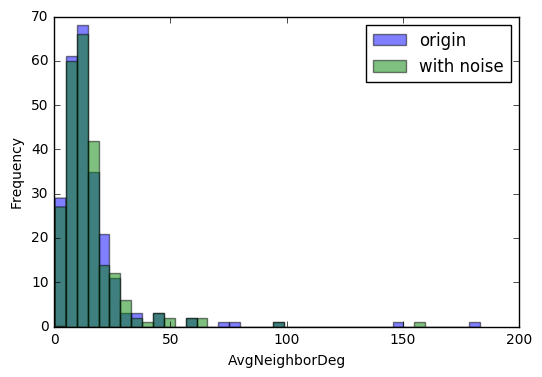

AvgNeighborInDeg


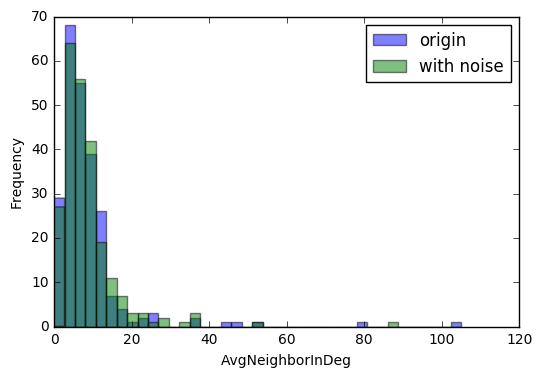

AvgNeighborOutDeg


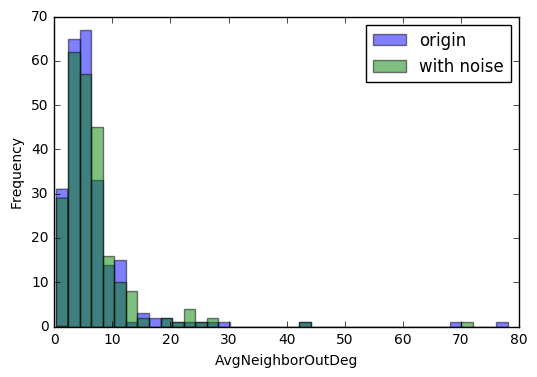

EgonetConnectivity


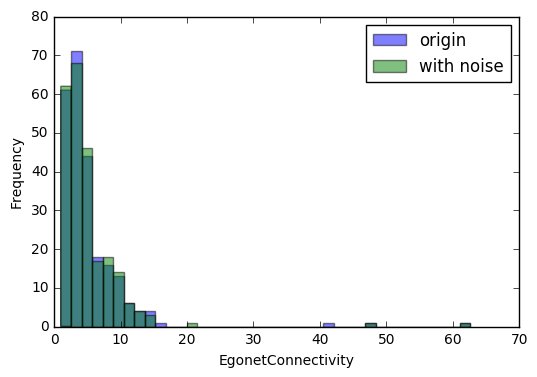

In [36]:
# plot attributes distributin against noise
import matplotlib.pyplot as plt

attributes = ['Degree','InDegree','OutDegree','NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity', \
                'PageRank', 'HubsScore', 'AuthoritiesScore', 'EgonetDegree', 'EgonetInDegree', 'EgonetOutDegree',\
                'AvgNeighborDeg', 'AvgNeighborInDeg', 'AvgNeighborOutDeg','EgonetConnectivity']
plt.clf()
for attr in attributes:
    print attr
    plt.figure()
    bins = np.linspace(min(min(attributesA[attr]), min(attributesB[attr])), max(max(attributesA[attr]), max(attributesB[attr])), 40)
    plt.hist(attributesA[attr], bins, alpha=0.5, label='origin')
    plt.hist(attributesB[attr], bins, alpha=0.5, label='with noise')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.show()

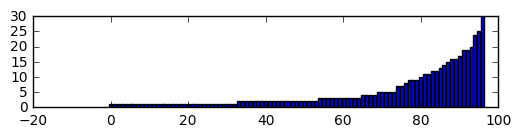

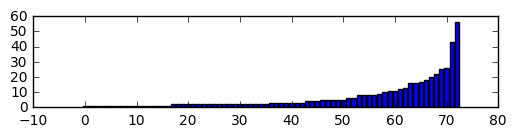

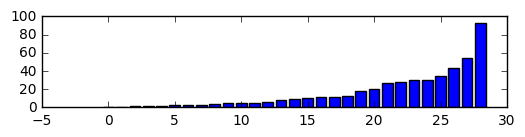

In [37]:
pair_count_dict = combineBucketsBySum(buckets, combineAB, 'metadata/phys-A.edges')
            
import matplotlib.pyplot as plt
plt.subplot(311)
plotBucketDistribution(bucketDeg)
plt.subplot(312)
plotBucketDistribution(bucketEdge)
plt.subplot(313)
plotBucketDistribution(bucketScore)
plt.show()

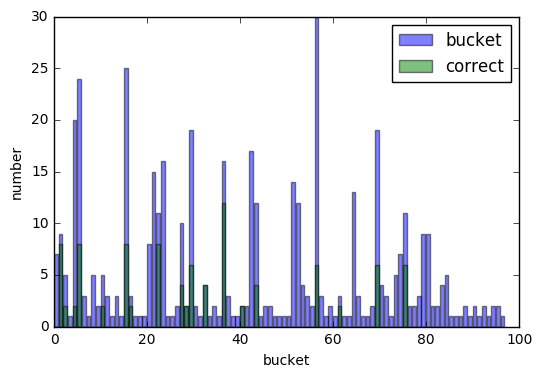

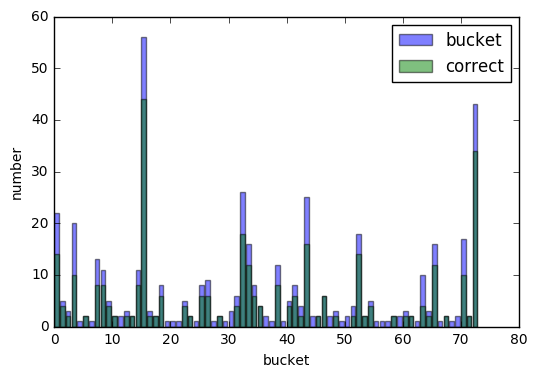

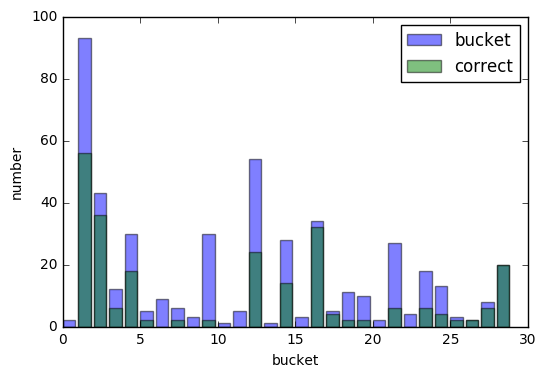

In [38]:
# plot cosine bucket correctness
def plotCorrectness(d, n):
    correct = {}
    for v, k in d.items():
        cnt = 0
        for i in k:
            if (i < n):
                if (i + n in k):
                    cnt += 2
            else:
                break
        correct[v] = cnt
    plt.clf
    plt.figure()
    plt.bar(range(len(d)), [len(v) for k,v in d.items()], alpha=0.5, label='bucket', color='blue')
    plt.bar(range(len(correct)), [correct[k] for k,v in d.items()], alpha=0.5, label='correct', color='green')
    plt.xlabel('bucket')
    plt.ylabel('number')
    plt.legend(loc='best')
    plt.show()
    
plotCorrectness(bucketDeg, attributesA.shape[0])
plotCorrectness(bucketEdge, attributesA.shape[0])
plotCorrectness(bucketScore, attributesA.shape[0])

In [39]:
matching_matrix = computeMatchingMat(attributesA, attributesB, pair_count_dict)
sim_matrix = computeWholeSimMat(attributesA, attributesB)

In [40]:
show_list = [0, 10, 20, 50]
top_k = 5
for i in show_list:
    print "cos sim top %d for node %d:" %(top_k, attributesA['Id'][i])
    print attributesB['Id'][sim_matrix[i].argsort()[-top_k:]].values
    print "matching top %d for node %d:"%(top_k, attributesA['Id'][i])
    print attributesB['Id'][matching_matrix[i].argsort()[-top_k:]].values


cos sim top 5 for node 1:
[56 46 25 48  1]
matching top 5 for node 1:
[ 65  67 107  26  46]
cos sim top 5 for node 11:
[14  9 10 17 11]
matching top 5 for node 11:
[10 17 11 39 12]
cos sim top 5 for node 21:
[ 1 48 58 42 21]
matching top 5 for node 21:
[46 58 42 36 21]
cos sim top 5 for node 51:
[87 60 49 63 51]
matching top 5 for node 51:
[153 240   6  60  51]


In [31]:
bandDeg = ['Degree','InDegree','OutDegree']
bucketDeg = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 2)
with open('metadata/euc-buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 2)
with open('metadata/euc-buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandScore = ['PageRank', 'HubsScore', 'AuthoritiesScore']
bucketScore = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandScore), 2)
with open('metadata/euc-buckets-band-3', 'w') as f:
    for k, v in bucketScore.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketScore.items())

23
32
28
